In [1]:
import time
import random
import pandas as pd
import networkx as nx
from mcrs.multi_feature_graph import multi_feature_graph

In [2]:
def initialization(nodes_with_connection, source_node, target_node):  # random initialization.
    if str(source_node) == str(target_node):
        return str(source_node)
    else:
        current_node = source_node
        path = []
        path.append(source_node)
        while current_node != target_node:
            ls = list(nodes_with_connection[current_node].keys())
            next = random.choice(ls)        
            path.append(next) 
            current_node = next
    return path
    

def firstDuplicate(a):
    set_ = set()
    for item in a:
        if item in set_:
            return item
        set_.add(item)
    return -1
    

def mending_function(individual):
    while firstDuplicate(individual) != -1:
        duplicate = firstDuplicate(individual)
        first = min(i for i, val in enumerate(individual) if val == duplicate)
        last = max(i for i, val in enumerate(individual) if val == duplicate)
        del individual[first:last]
    return individual
    

def Path_Length(path, graph_network):
    edge_weights = nx.get_edge_attributes(graph_network, 'weight')
    path_length = 0
    for k in range(len(path) - 1):
        edge = (path[k], path[k+1])
        reverse_edge = (path[k+1], path[k])
        if edge in edge_weights:
            path_length += edge_weights[edge]
        else:
            path_length += edge_weights[reverse_edge]
    return path_length

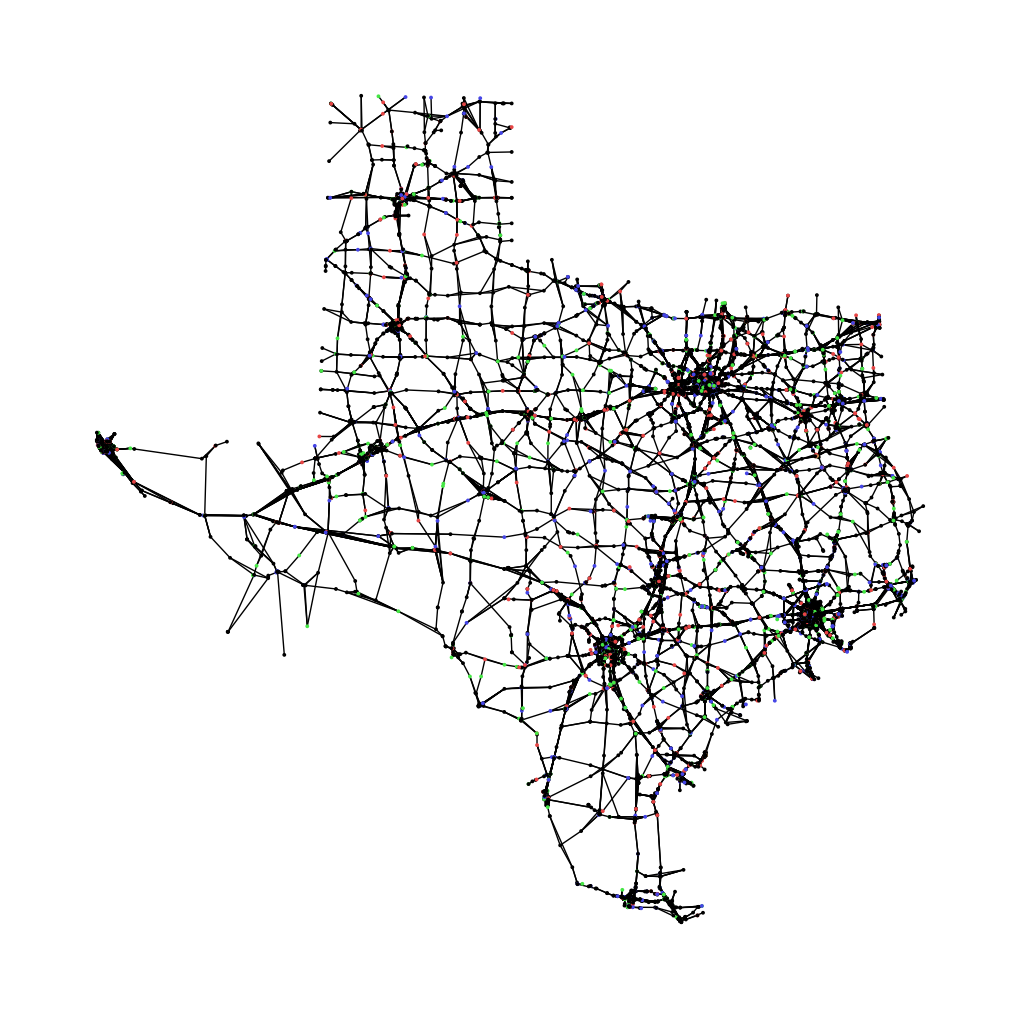

In [3]:
random.seed(42)

network_edge_list = "Networks/graph_format/texas.xlsx"
dataset = pd.read_excel(network_edge_list)
network, nodes_with_connection, amenity_record = multi_feature_graph(dataset = dataset, amenity_count = 3, plt_size = (10, 10), node_size = 3)

In [4]:
network.number_of_nodes()

10886

# The total number of nodes in our network is 10,886, so the source and target nodes must be between 0 and 10,885, and they must not be the same.

In [5]:
example_path = initialization(nodes_with_connection, source_node = 376, target_node = 2199) # example
example_path[:20]

[376,
 598,
 377,
 820,
 3823,
 7398,
 807,
 240,
 585,
 240,
 806,
 8535,
 10871,
 8535,
 7399,
 8834,
 8535,
 7399,
 8535,
 806]

In [6]:
len(example_path)

7067

# Now, we will eliminate the duplicates from our path using the mending function and verify the results.

In [7]:
without_duplicate_path = mending_function(example_path)
without_duplicate_path[:20]

[376,
 598,
 377,
 820,
 3823,
 817,
 3825,
 5984,
 4491,
 1355,
 176,
 170,
 171,
 877,
 3603,
 218,
 1117,
 6396,
 2231,
 6389]

In [8]:
len(without_duplicate_path)

175

# So, from a path with a total of 7067 nodes, only 175 were without a loop.

In [9]:
with_duplicate_length = Path_Length(example_path, network)

without_duplicate_length = Path_Length(without_duplicate_path, network)

with_duplicate_length == without_duplicate_length

True

In [10]:
with_duplicate_length, without_duplicate_length

(3200.3493579737565, 3200.3493579737565)